In [2]:
import pickle
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
with open("no_correction_all_phases.pkl", 'rb') as f:
    freq_phases=pickle.load(f)

In [4]:
notes = pd.read_csv('notes.csv')
wall_distances=list(notes["Wall Dist"])

In [5]:
wall_dist_freq_phase=[]
wall_dist_freq_phase
freqXwallDist=np.zeros([len(list(freq_phases.keys())),len(wall_distances)])
for wall_distance in wall_distances:
    wall_dist_freq_phase.append((wall_distance, {}))
for freq_idx,freq in enumerate(freq_phases.keys()):
    assert(len(list(freq_phases[freq].keys()))==1)
    dist=list(freq_phases[freq].keys())[0]
    for idx, phase in enumerate(freq_phases[freq][dist]):
        wall_dist_freq_phase[idx][1][freq]=phase
        freqXwallDist[freq_idx][idx]=phase        

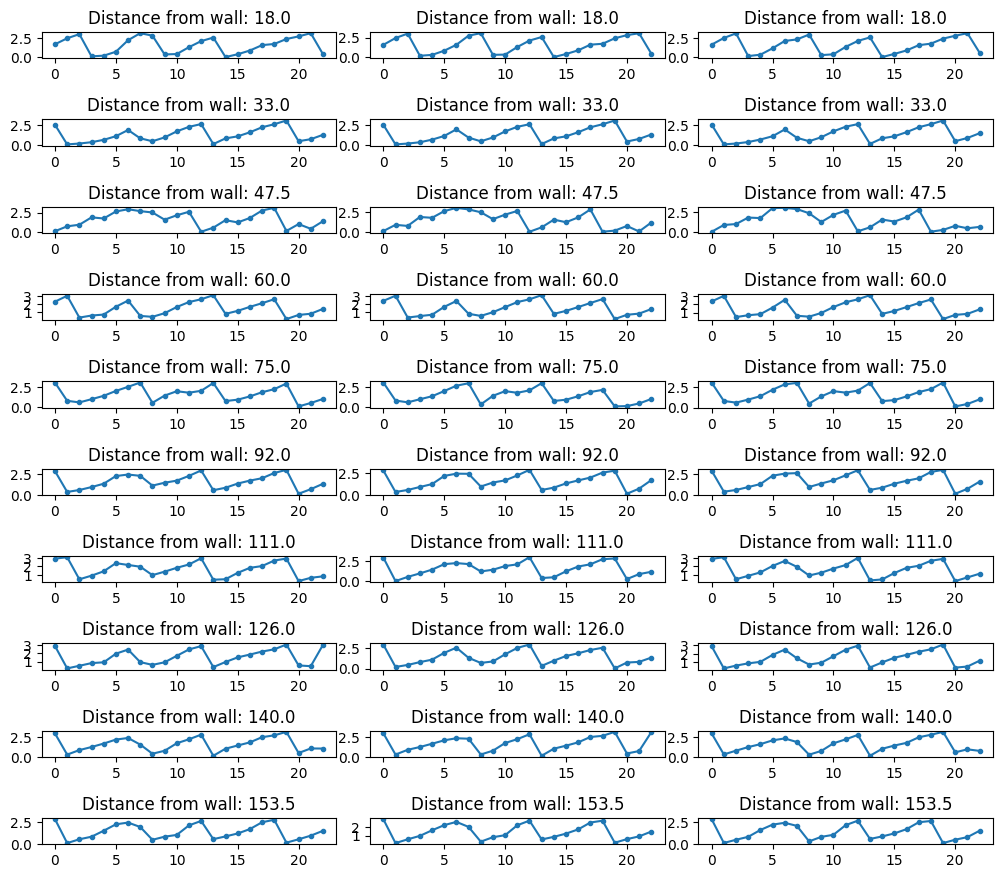

In [6]:
plt.figure(figsize=(10,20))
for idx in range(1, len(wall_distances)+1):
    plt.subplot(len(list(freq_phases.keys())),3,idx)
    plt.plot(wall_dist_freq_phase[idx-1][1].values(),'.-')
    plt.title(f"Distance from wall: {wall_distances[idx-1]}")
plt.tight_layout()
plt.show()

In [7]:
list(freq_phases.keys())

[775000000,
 785000000,
 795000000,
 805000000,
 815000000,
 825000000,
 835000000,
 845000000,
 855000000,
 865000000,
 875000000,
 885000000,
 895000000,
 905000000,
 915000000,
 925000000,
 935000000,
 945000000,
 955000000,
 965000000,
 975000000,
 985000000,
 995000000]

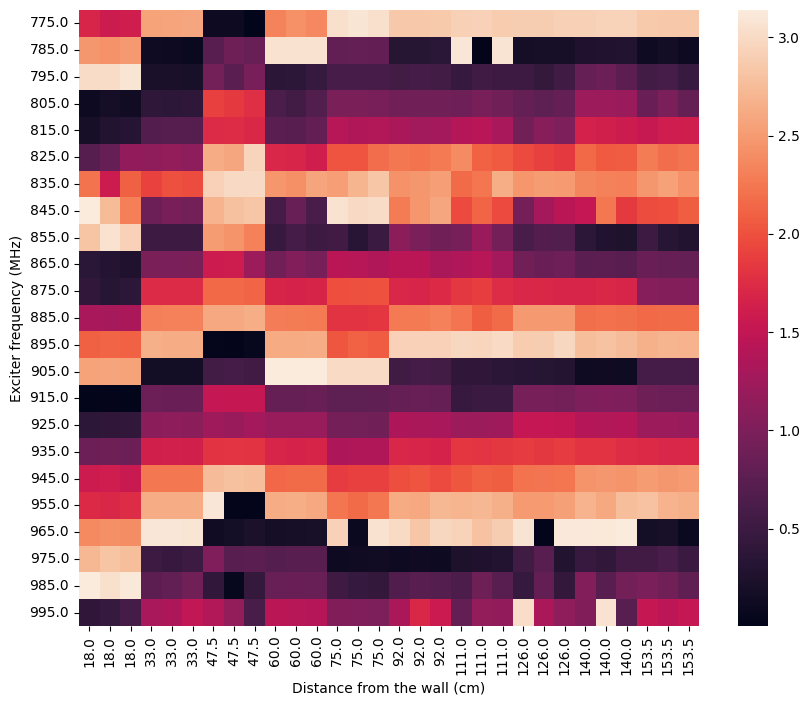

In [8]:
plt.figure(figsize=(10,8))
yticks = np.array(range(0, len(list(freq_phases.keys()))), dtype=np.int32)
ax = sns.heatmap(freqXwallDist, 
                 yticklabels=np.array(list(freq_phases.keys()))/1e6,
                 xticklabels=wall_distances)
# ax.set_yticks(yticks)
plt.xlabel("Distance from the wall (cm)")
plt.ylabel("Exciter frequency (MHz)")
plt.show()

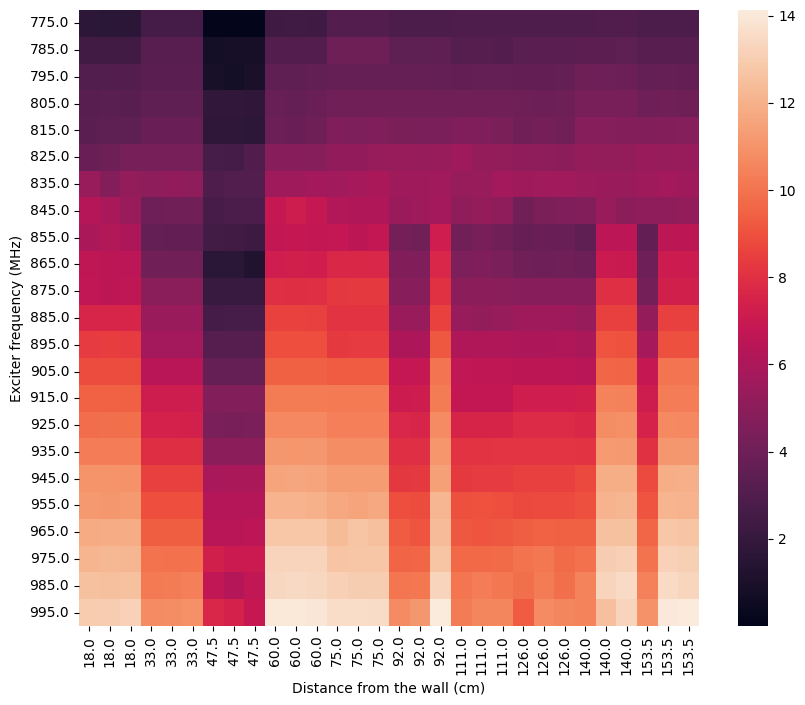

In [54]:
plt.figure(figsize=(10,8))
yticks = np.array(range(0, len(list(freq_phases.keys()))), dtype=np.int32)
ax = sns.heatmap(np.unwrap(freqXwallDist, period=np.pi, axis=0), 
                 yticklabels=np.array(list(freq_phases.keys()))/1e6,
                 xticklabels=wall_distances)
# ax.set_yticks(yticks)
plt.xlabel("Distance from the wall (cm)")
plt.ylabel("Exciter frequency (MHz)")
plt.show()

In [9]:
# Will ML model be able to differentiate
# How many minimum freqs will be required.


In [94]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# Example: 100 points in 5D
X = freqXwallDist.transpose()
# X = np.unwrap(freqXwallDist, period=np.pi, axis=0).transpose()

# Step 1: Reduce to 2D
# pca = PCA(n_components=3)
# X_3d = pca.fit_transform(X)

# Step 2: Find nearest neighbors
k = 3
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
# Step 3: Plot
# plt.figure(figsize=(8, 6))
# plt.scatter(X_2d[:, 0], X_2d[:, 1], c="blue", s=30)

# Draw lines to neighbors
# for i, neighbors in enumerate(indices):
#     for j in neighbors[1:]:  # skip the point itself
#         plt.plot([X_2d[i, 0], X_2d[j, 0]], [X_2d[i, 1], X_2d[j, 1]], "k-", alpha=0.3)

# plt.title("kNN graph (2D projection)")
# plt.show()


[[ 0  1  2 12]
 [ 1  2  0 12]
 [ 2  1  0 10]
 [ 3  4  5 23]
 [ 4  3  5 23]
 [ 5  4  3 23]
 [ 6  7  8 27]
 [ 7  8  6 28]
 [ 8  7  6 28]
 [ 9 11 10 13]
 [10  9 11 13]
 [11  9 10 13]
 [12 14 13 17]
 [13 12 14 29]
 [14 12 17 13]
 [15 17 16 19]
 [16 17 15 19]
 [17 16 15 19]
 [18 20 15 17]
 [19 15 16 17]
 [20 18 15 17]
 [21 25 23  5]
 [22 27 28 29]
 [23 24 26 15]
 [24 26 23 19]
 [25 21 16 17]
 [26 24 23 19]
 [27 28 29 22]
 [28 27 29 22]
 [29 28 27 22]]


In [95]:
for idx in range(len(indices)):
    print(f"{idx} ({wall_distances[idx]}) is closest to: ",end='')
    st=""
    for i2 in indices[idx]:
        st+=f" {i2} ({wall_distances[i2]})"
    print(st)

0 (18.0) is closest to:  0 (18.0) 1 (18.0) 2 (18.0) 12 (75.0)
1 (18.0) is closest to:  1 (18.0) 2 (18.0) 0 (18.0) 12 (75.0)
2 (18.0) is closest to:  2 (18.0) 1 (18.0) 0 (18.0) 10 (60.0)
3 (33.0) is closest to:  3 (33.0) 4 (33.0) 5 (33.0) 23 (126.0)
4 (33.0) is closest to:  4 (33.0) 3 (33.0) 5 (33.0) 23 (126.0)
5 (33.0) is closest to:  5 (33.0) 4 (33.0) 3 (33.0) 23 (126.0)
6 (47.5) is closest to:  6 (47.5) 7 (47.5) 8 (47.5) 27 (153.5)
7 (47.5) is closest to:  7 (47.5) 8 (47.5) 6 (47.5) 28 (153.5)
8 (47.5) is closest to:  8 (47.5) 7 (47.5) 6 (47.5) 28 (153.5)
9 (60.0) is closest to:  9 (60.0) 11 (60.0) 10 (60.0) 13 (75.0)
10 (60.0) is closest to:  10 (60.0) 9 (60.0) 11 (60.0) 13 (75.0)
11 (60.0) is closest to:  11 (60.0) 9 (60.0) 10 (60.0) 13 (75.0)
12 (75.0) is closest to:  12 (75.0) 14 (75.0) 13 (75.0) 17 (92.0)
13 (75.0) is closest to:  13 (75.0) 12 (75.0) 14 (75.0) 29 (153.5)
14 (75.0) is closest to:  14 (75.0) 12 (75.0) 17 (92.0) 13 (75.0)
15 (92.0) is closest to:  15 (92.0) 17 (92.

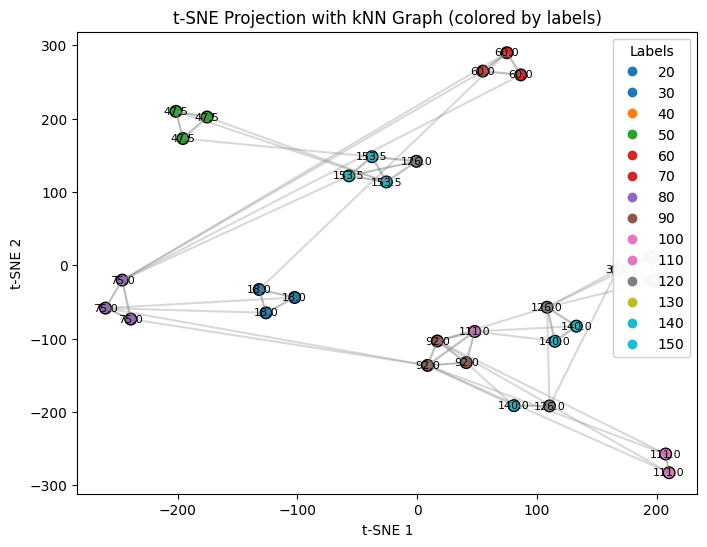

Row 0 (label 18.0) neighbors: [ 1  2 12]
Row 1 (label 18.0) neighbors: [ 2  0 12]
Row 2 (label 18.0) neighbors: [ 1  0 10]
Row 3 (label 33.0) neighbors: [ 4  5 23]
Row 4 (label 33.0) neighbors: [ 3  5 23]
Row 5 (label 33.0) neighbors: [ 4  3 23]
Row 6 (label 47.5) neighbors: [ 7  8 27]
Row 7 (label 47.5) neighbors: [ 8  6 28]
Row 8 (label 47.5) neighbors: [ 7  6 28]
Row 9 (label 60.0) neighbors: [11 10 13]
Row 10 (label 60.0) neighbors: [ 9 11 13]
Row 11 (label 60.0) neighbors: [ 9 10 13]
Row 12 (label 75.0) neighbors: [14 13 17]
Row 13 (label 75.0) neighbors: [12 14 29]
Row 14 (label 75.0) neighbors: [12 17 13]
Row 15 (label 92.0) neighbors: [17 16 19]
Row 16 (label 92.0) neighbors: [17 15 19]
Row 17 (label 92.0) neighbors: [16 15 19]
Row 18 (label 111.0) neighbors: [20 15 17]
Row 19 (label 111.0) neighbors: [15 16 17]
Row 20 (label 111.0) neighbors: [18 15 17]
Row 21 (label 126.0) neighbors: [25 23  5]
Row 22 (label 126.0) neighbors: [27 28 29]
Row 23 (label 126.0) neighbors: [24 26 

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

# X: (30, 23) data matrix
# y: (30,) label array (integers)

# Step 1: Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_2d = tsne.fit_transform(X)

# Step 2: Find nearest neighbors in original 23D space
k = 3
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
distances, indices = nbrs.kneighbors(X)

# Step 3: Plot with labels as colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=wall_distances, cmap="tab10", s=70, edgecolors="k")

# Draw kNN connections
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:  # skip itself
        plt.plot([X_2d[i, 0], X_2d[j, 0]],
                 [X_2d[i, 1], X_2d[j, 1]],
                 "gray", alpha=0.3)

# Add text labels on top of each point
for i, (x, y_coord) in enumerate(X_2d):
    plt.text(x, y_coord, str(wall_distances[i]), fontsize=8,
             ha="center", va="center", color="black")

# Add legend for colors
legend1 = plt.legend(*scatter.legend_elements(), title="Labels")
plt.gca().add_artist(legend1)

plt.title("t-SNE Projection with kNN Graph (colored by labels)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

# Print row indices of neighbors for reference
for i, neighbors in enumerate(indices):
    print(f"Row {i} (label {wall_distances[i]}) neighbors: {neighbors[1:]}")


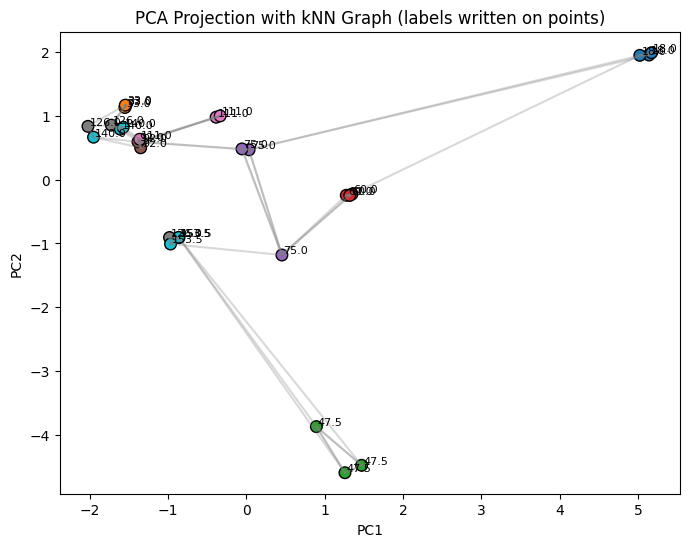

Row 0 (label 18.0) neighbors: [ 1  2 12]
Row 1 (label 18.0) neighbors: [ 2  0 12]
Row 2 (label 18.0) neighbors: [ 1  0 10]
Row 3 (label 33.0) neighbors: [ 4  5 23]
Row 4 (label 33.0) neighbors: [ 3  5 23]
Row 5 (label 33.0) neighbors: [ 4  3 23]
Row 6 (label 47.5) neighbors: [ 7  8 27]
Row 7 (label 47.5) neighbors: [ 8  6 28]
Row 8 (label 47.5) neighbors: [ 7  6 28]
Row 9 (label 60.0) neighbors: [11 10 13]
Row 10 (label 60.0) neighbors: [ 9 11 13]
Row 11 (label 60.0) neighbors: [ 9 10 13]
Row 12 (label 75.0) neighbors: [14 13 17]
Row 13 (label 75.0) neighbors: [12 14 29]
Row 14 (label 75.0) neighbors: [12 17 13]
Row 15 (label 92.0) neighbors: [17 16 19]
Row 16 (label 92.0) neighbors: [17 15 19]
Row 17 (label 92.0) neighbors: [16 15 19]
Row 18 (label 111.0) neighbors: [20 15 17]
Row 19 (label 111.0) neighbors: [15 16 17]
Row 20 (label 111.0) neighbors: [18 15 17]
Row 21 (label 126.0) neighbors: [25 23  5]
Row 22 (label 126.0) neighbors: [27 28 29]
Row 23 (label 126.0) neighbors: [24 26 

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

# X: (30, 23) data matrix
# y: (30,) label array (integers)

# Step 1: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

# Step 2: Find nearest neighbors in original 23D space
k = 3
nbrs = NearestNeighbors(n_neighbors=k+1).fit(X)
distances, indices = nbrs.kneighbors(X)

# Step 3: Plot with labels directly on the graph
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=wall_distances, cmap="tab10", s=70, edgecolors="k")

# Add text labels for each point
for i in range(len(wall_distances)):
    plt.text(X_2d[i, 0] + 0.02, X_2d[i, 1] + 0.02, str(wall_distances[i]),
             fontsize=8, color="black")

# Draw kNN connections
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:  # skip itself
        plt.plot([X_2d[i, 0], X_2d[j, 0]],
                 [X_2d[i, 1], X_2d[j, 1]],
                 "gray", alpha=0.3)

plt.title("PCA Projection with kNN Graph (labels written on points)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Print row indices of neighbors for reference
for i, neighbors in enumerate(indices):
    print(f"Row {i} (label {wall_distances[i]}) neighbors: {neighbors[1:]}")
